In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Data Loading and Visualization

In [149]:
df = pd.read_csv('banknote-authentication_csv.csv')
features = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


# Perceptron Modelling

## Neural Network

In [150]:
# Softmax activation function
def softmax(vector):
    vector_new = np.random.randn(vector.shape[0], vector.shape[1])
    for i in range(vector.shape[0]):
        e = np.exp(vector[i,:])
        e = e / e.sum()
        vector_new[i, 0] = e[0]
        vector_new[i, 1] = e[1]
        
    return vector_new

In [151]:
# Forward propogation
def forward_prop(X, W1, W2, b1, b2, K0, K1):
    # Calculating activationa
    Z1 = np.dot(X, W1) + b1
    A1 = K0 + K1 * Z1
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
      
    # Here cache is the data of previous iteration, to be used for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "K0": K0,
             "K1": K1}
    
    return A2, cache

In [152]:
# Categorical cross entropy loss
def compute_loss(A2, Y):
    return -1 * np.sum(Y * np.log(A2))

In [153]:
# Backward propogation
def back_prop(W1, b1, W2, b2, cache, learning_rate):
    m = 960
    # Retrieval from cache
    Z1 = cache['Z1']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    K0 = cache['K0']
    K1 = cache['K1']
  
    # Backward propagation: calculating the gradients
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = np.mean(dZ2, axis = 0)
    
    dA1 = np.dot(dZ2, W2.T)
  
    dZ1 = K1 * dA1
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = np.mean(dZ1, axis = 0)
    
    dK0 = np.mean(dA1)
    dK1 = np.mean(dA1 * Z1)
      
    # Updating the parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    K0 = K0 - learning_rate * dK0
    K1 = K1 - learning_rate * dK1
  
    return W1, W2, b1, b2, K0, K1

In [154]:
# Calculating accuracy
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

## Train Network

In [155]:
def train(X, Y, W1, W2, b1, b2, K0, K1, epochs, lr, bat_s):
    # training network
    losses = []
    for epoch in range(epochs):
        # Forward propagation
        A2, cache = forward_prop(X, W1, W2, b1, b2, K0, K1)
        
        # Loss computation
        loss = compute_loss(A2, Y)
        losses.append(loss)
        print ('epoch=%d, lrate=%.3f, loss=%.3f' % (epoch, lr, loss))

        # Backpropagation
        W1, W2, b1, b2, K0, K1 = back_prop(W1, b1, W2, b2, cache, lr)
    
    # Training eccuracy
    pred = accuracy_metric(labels_train, np.round(A2)[:,1] + 1)
        
    return W1, W2, b1, b2, K0, K1, losses, pred

## Parameters

In [156]:
# Parameters
# X --> input dataset
# Y --> labels
np.random.seed(10)

X = features_train
Y = np.zeros((labels_train.shape[0], 2))
for i in range(len(labels_train)):
    Y[i, labels_train[i]-1] = 1

n_hidden = 4 # number of hidden layer

W1 = np.random.randn(X.shape[1], n_hidden); W2 = np.random.randn(n_hidden, 2)
b1 = np.random.randn(1, n_hidden); b2 = np.random.randn(1, 2)
K0 = np.random.randn(); K1 = np.random.randn()


epochs = 45; lr = 0.1; bat_s = 960

# Model Training

In [157]:
W1, W2, b1, b2, K0, K1, losses, train_acc = train(X, Y, W1, W2, b1, b2, K0, K1, epochs, lr, bat_s)

epoch=0, lrate=0.100, loss=2535.792
epoch=1, lrate=0.100, loss=1187.042
epoch=2, lrate=0.100, loss=711.735
epoch=3, lrate=0.100, loss=475.758
epoch=4, lrate=0.100, loss=341.395
epoch=5, lrate=0.100, loss=259.687
epoch=6, lrate=0.100, loss=208.800
epoch=7, lrate=0.100, loss=176.706
epoch=8, lrate=0.100, loss=155.700
epoch=9, lrate=0.100, loss=141.140
epoch=10, lrate=0.100, loss=130.441
epoch=11, lrate=0.100, loss=122.177
epoch=12, lrate=0.100, loss=115.534
epoch=13, lrate=0.100, loss=110.022
epoch=14, lrate=0.100, loss=105.335
epoch=15, lrate=0.100, loss=101.269
epoch=16, lrate=0.100, loss=97.687
epoch=17, lrate=0.100, loss=94.490
epoch=18, lrate=0.100, loss=91.606
epoch=19, lrate=0.100, loss=88.982
epoch=20, lrate=0.100, loss=86.576
epoch=21, lrate=0.100, loss=84.355
epoch=22, lrate=0.100, loss=82.295
epoch=23, lrate=0.100, loss=80.375
epoch=24, lrate=0.100, loss=78.577
epoch=25, lrate=0.100, loss=76.888
epoch=26, lrate=0.100, loss=75.295
epoch=27, lrate=0.100, loss=73.790
epoch=28, lr

# Prediction

In [158]:
# Prediction function
def predict(X, Y, W1, W2, b1, b2, K0, K1):
    # Forward propagation
    A2, cache = forward_prop(X, W1, W2, b1, b2, K0, K1)
    return A2

In [159]:
X = features_test
Y = np.zeros((labels_test.shape[0], 2))
for i in range(len(labels_test)):
    Y[i, labels_train[i] - 1] = 1

model_output = predict(X, Y, W1, W2, b1, b2, K0, K1)
test_acc = accuracy_metric(labels_test, np.round(model_output)[:,1] + 1)
train_loss = losses[-1]
test_loss = compute_loss(model_output, Y)
f1_s = f1_score(labels_test, np.round(model_output)[:,1] + 1)
print('train_acc : ', train_acc)
print('test_acc : ', test_acc)
print('train_loss : ', train_loss)
print('test_loss : ', test_loss)
print('f1_score : ', f1_s)

train_acc :  98.99726526891523
test_acc :  97.45454545454545
train_loss :  56.3672134590239
test_loss :  593.0212703872828
f1_score :  0.9761092150170648


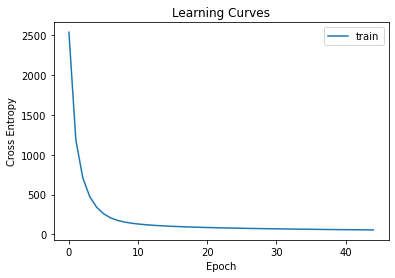

In [161]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(range(epochs), losses, label='train')
plt.legend()
plt.show()

In [162]:
print('final W1 : ', W1)
print('final W2 : ', W2)
print('final b1 : ', b1)
print('final b2 : ', b2)
print('final K0 : ', K0)
print('final K1 : ', K1)

final W1 :  [[ 1.6525569   0.12469618 -1.5823404   0.50137239]
 [ 0.54100932 -0.58182325  0.26876868 -0.0108593 ]
 [-0.0463777  -0.07885572  0.41778809  1.12388043]
 [-0.64926991  0.45383223  0.16639861  0.94681872]]
final W2 :  [[-1.09081254  0.0893472 ]
 [ 1.38939862 -0.98466651]
 [-1.53833402 -2.18276656]
 [ 0.29553834  2.35549916]]
final b1 :  [[1.00868435 1.88297185 0.12974825 1.2131857 ]]
final b2 :  [[-0.50388256  0.84583876]]
final K0 :  -0.23025235038196115
final K1 :  -0.453595713339841
